### Loading library

In [23]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from matplotlib import pyplot as plt

import numpy as np

### Loading dataset

In [2]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing(as_frame=True)

In [3]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

In [4]:
data['data'][:3]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24


In [5]:
data['target'][:3]

0    4.526
1    3.585
2    3.521
Name: MedHouseVal, dtype: float64

### Preparing and fitting data

In [6]:
X, y = data['data'], data['target']

In [7]:
print("Object matrix size:", X.shape)
print("Vector size y:: ", y.shape)

Object matrix size: (20640, 8)
Vector size y::  (20640,)


Let's look at our data. Let's build a graph of how the price depends on the average number of rooms. To do this, we will use the matplotlib library.

Text(0, 0.5, 'Price')

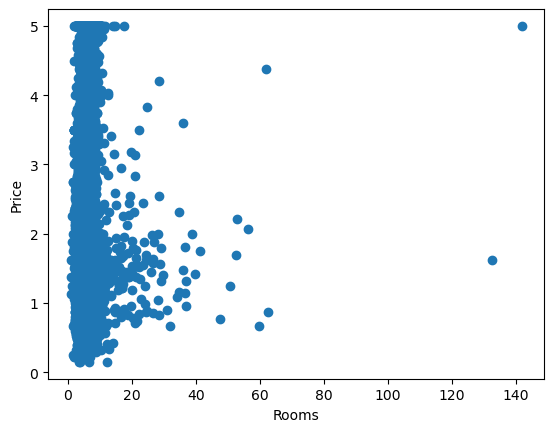

In [8]:
plt.scatter(X['AveRooms'], y)
plt.xlabel('Rooms')
plt.ylabel('Price')

Using the train_test_split function, we will split the sample into train and test.

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Creating and fitting model

In [10]:
knn = KNeighborsRegressor(n_neighbors=5, weights='uniform', p=2)

In [11]:
# fit model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [12]:
#make prediction and measure accurance
predictions = knn.predict(X_test)
mean_squared_error(y_test, predictions)

1.1632947077623845

Let's run a search on the hyperparameter grid, the algorithm will go through all possible combinations, calculate the metric for each set and return the best set.

In [13]:
grid_searcher = GridSearchCV(KNeighborsRegressor(),
                             param_grid={'n_neighbors': range(1, 40, 2),
                                         'weights': ['uniform', 'distance'],
                                         'p': [1, 2, 3]},
                             cv=5)

In [14]:
grid_searcher.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 40, 2), 'p': [1, 2, 3],
                         'weights': ['uniform', 'distance']})

In [18]:
grid_searcher.best_params_

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}

Prediction of the best model.

In [15]:
best_predictions = grid_searcher.predict(X_test)

In [16]:
mean_squared_error(y_test, best_predictions)

0.9839320590122917

Let's look at the quality of the algorithm depending on the number of neighbors. We will evaluate the quality using the training sample

In [24]:
metrics = []
for n in range(1, 40, 2):
    knn = KNeighborsRegressor(n_neighbors = n)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
    metrics.append(np.mean(scores))

Text(0.5, 0, 'Number of neightbors')

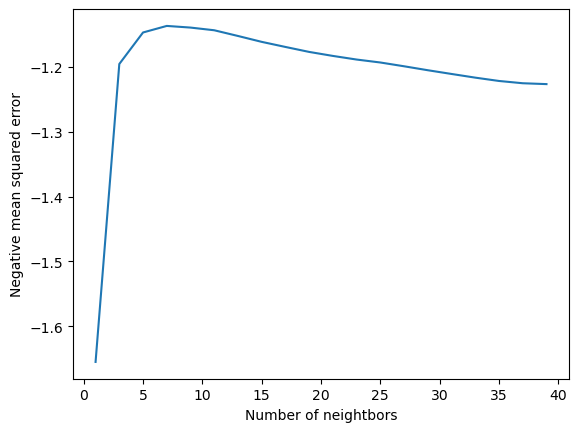

In [26]:
plt.plot(range(1, 40, 2), metrics)
plt.ylabel('Negative mean squared error')
plt.xlabel('Number of neightbors')